# IRIS CLASSIFITCATION 

In [203]:
import pandas as pd

In [204]:
iris_df = pd.read_csv('./Data/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [205]:
iris_df.drop(columns="Id", inplace=True) # inplace, melakukan proses edit nilai variable tanpa membuat variable baru
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [206]:
iris_df.shape #  Baris x Kolom

(150, 5)

In [207]:
iris_df.columns # Menampilkan kolom

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [208]:
iris_df.dtypes  

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [209]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [210]:
iris_df.isna().values.any() 

False

In [211]:
# iris_df[iris_df.duplicated(keep=False)] # Menampilkan data duplikasi (semua)
iris_df[iris_df.duplicated()] # Menampilkan data (sekunder)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [212]:
iris_df.duplicated().value_counts() # Duplicate 3

False    147
True       3
dtype: int64

In [213]:
iris_df.drop_duplicates(inplace=True) # Menghapus duplikasi data
iris_df.shape

(147, 5)

In [214]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [215]:
# Correlation Matriks
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# Data Visualitation

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline 

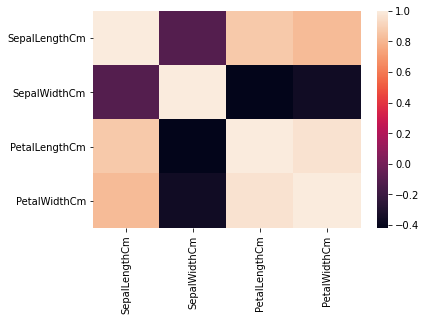

In [217]:
sns.heatmap(data=iris_df.corr())

In [218]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

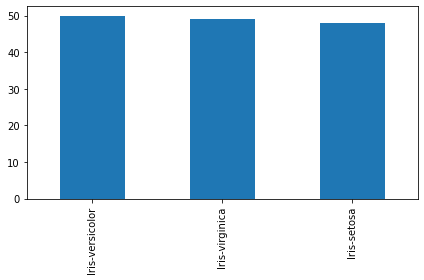

In [219]:
iris_df['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

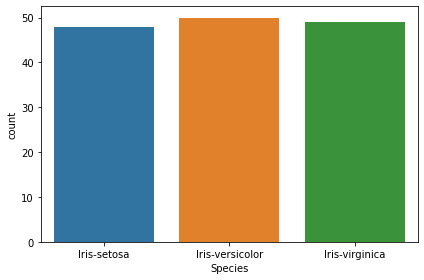

In [220]:
sns.countplot(data = iris_df, x ="Species")
plt.tight_layout()

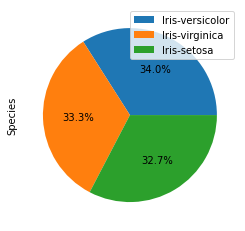

In [221]:
# Pie Chart
iris_df["Species"].value_counts().plot.pie(autopct="%1.1f%%", labels=None, legend = True)

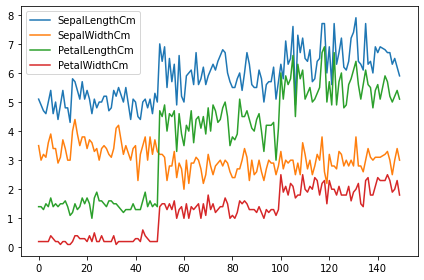

In [222]:
# Line Plot
iris_df.plot()
plt.tight_layout()

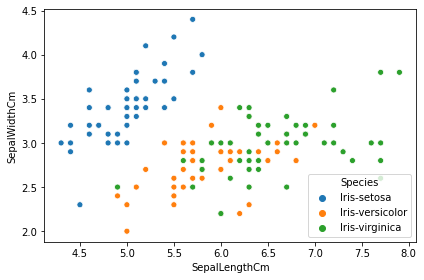

In [223]:
sns.scatterplot(x="SepalLengthCm", y ="SepalWidthCm", data=iris_df, hue= 'Species')
plt.tight_layout()

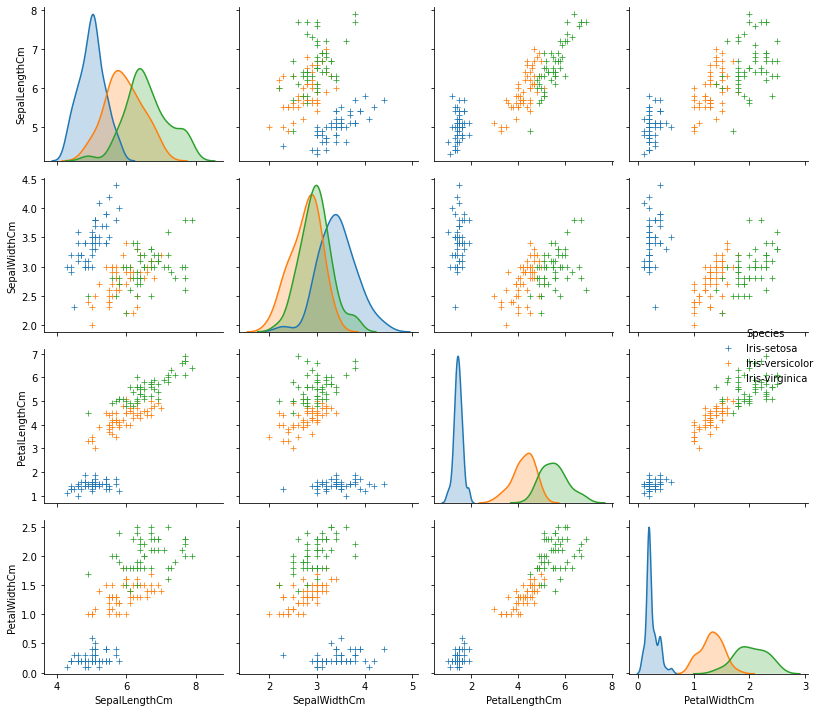

In [224]:
# Pair Plot
sns.pairplot(iris_df, hue="Species", markers='+')
plt.tight_layout()

# MODEL KLASIFIKASI

In [225]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [226]:
# Feature
X = iris_df.drop(columns="Species")
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [227]:
#Label
y = iris_df["Species"]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [228]:
# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print("Training data")
print(X_train.shape)
print(y_train.shape)
print("Testing data")
print(X_test.shape)
print(y_test.shape)

Training data
(117, 4)
(117,)
Testing data
(30, 4)
(30,)


# KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)
    y_pred =model_knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

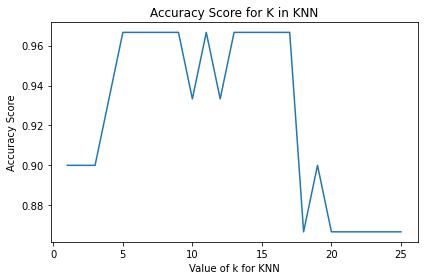

In [231]:
plt.plot(k_range,scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for K in KNN")
plt.tight_layout()
plt.show()

In [232]:
model_knn2 = KNeighborsClassifier(n_neighbors=7)
model_knn2.fit(X_train,y_train)
y_pred2 = model_knn2.predict(X_test)

In [233]:
print(accuracy_score(y_test, y_pred2))

0.9666666666666667


In [234]:
print(confusion_matrix(y_test, y_pred2))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]


In [235]:
print(classification_report(y_test, y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
model_logreg = LogisticRegression(solver = 'lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred_log = model_logreg.predict(X_test)

In [238]:
print(accuracy_score(y_test,y_pred_log))

0.9


In [239]:
print(confusion_matrix(y_test,y_pred_log))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  3  7]]


In [240]:
print(classification_report(y_test,y_pred_log))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.70      0.82        10

       accuracy                           0.90        30
      macro avg       0.93      0.90      0.90        30
   weighted avg       0.92      0.90      0.90        30



# Accuracy Comparision

In [241]:
models = [model_knn2,model_logreg]
accuracy_scores = []
for model in models:
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.9666666666666667, 0.9]


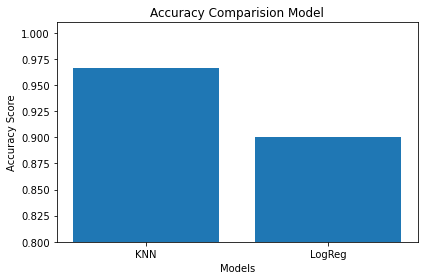

In [242]:
plt.bar(["KNN","LogReg"],accuracy_scores)
plt.ylim(0.8,1.01)
plt.title("Accuracy Comparision Model")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()